# Message passing and Node Classification

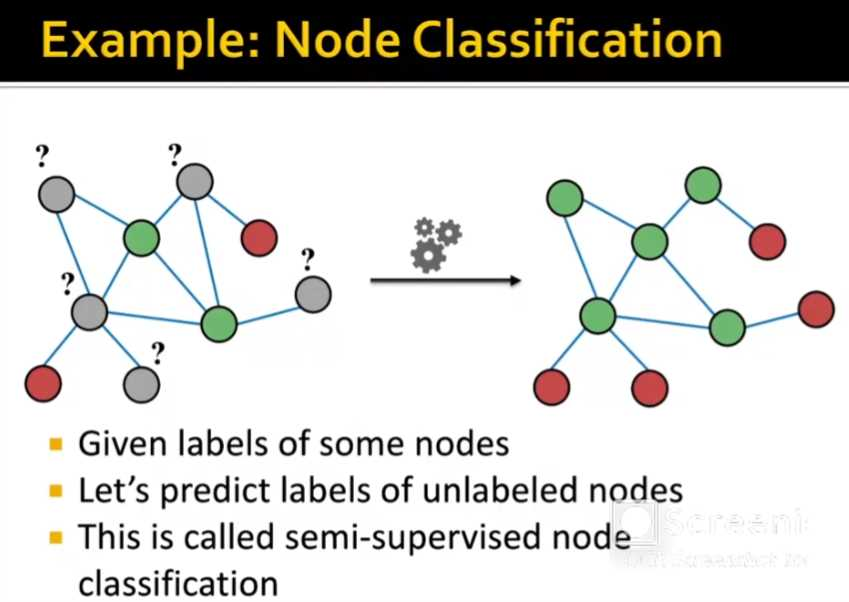

- 물음표 되어 있는 노드들이 어떤 색깔로 분류할 지, 예측하는 것
- 반-지도 학습이다.

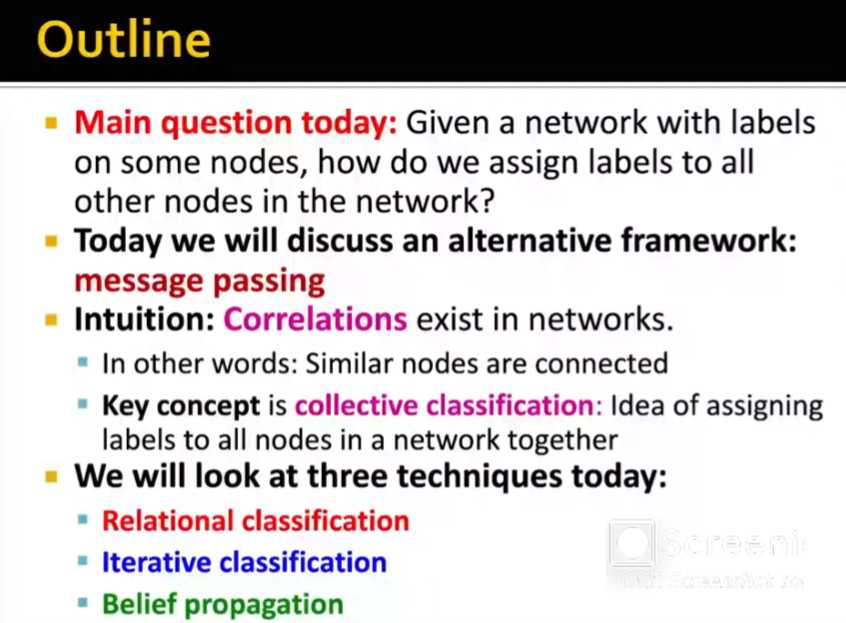

- Main question today: 몇 개의 노드가 라벨링 되있는 그래프에서 모든 다른 노드를 어떻게 라벨링 할가 ?


### - massage passing



그래프 구조에서 **각 노드**는 **이웃 노드들로부터** 정보를 **자신의 상태를 업데이트** 한다.

- 노드 : 사람
- 이웃 : 친구
- 친구들로부터 조언(information)을 받아서 자신의 생각(vector)를 정리한다.
- 이 과정을 반복하면, 사람들은 주변의 영향으로 점점 더 공통된 지식 또는 분류 기준을 갖게 된다.

### - Correlation (상관관계)

두 노드가 같은 클래스인지를 말할 수 있는 척도

- 두 노드가 자주 같이 등장 : 상관관계 있음
- 임베딩 벡터간 내적 또는 코사인 유사도를 계산해서 상관관계를 평가할 수도 있다.
- GNN에서는 이 상관관계를 임베딩 공간에서의 거리/유사도로 표현한다.

### - 세 가지 기술들이 있다.

- Relational classification
- Iterative classification
- Belief propagation

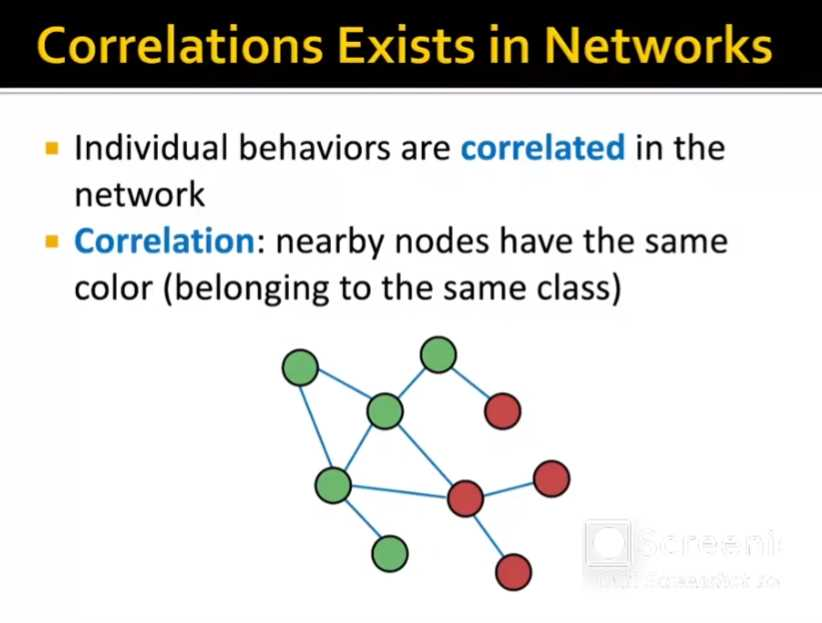

- 가까운 노드는 같은 색깔을 가진다.

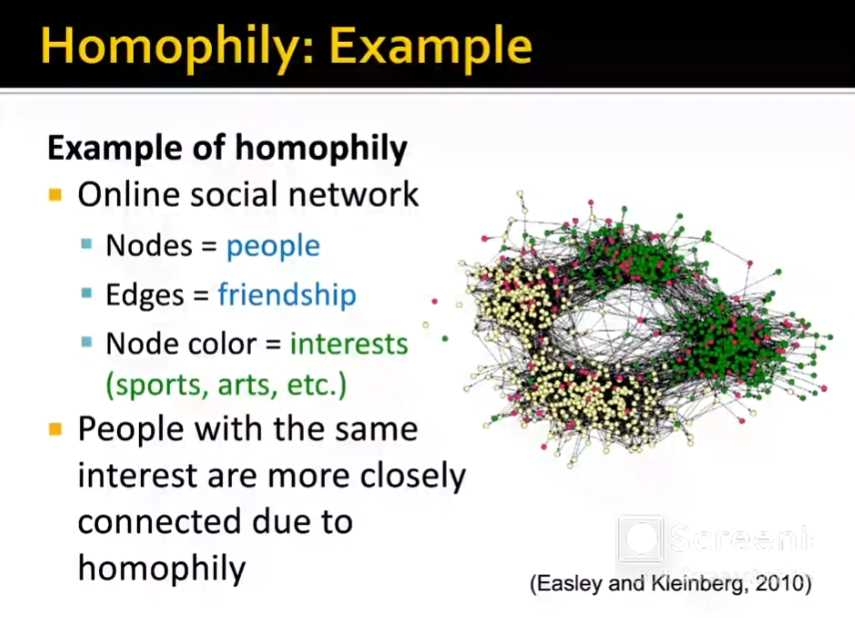

### - Homophily(동질성)

- 비슷한 관심사를 가진 사람은 가깝게 연결되어있다.

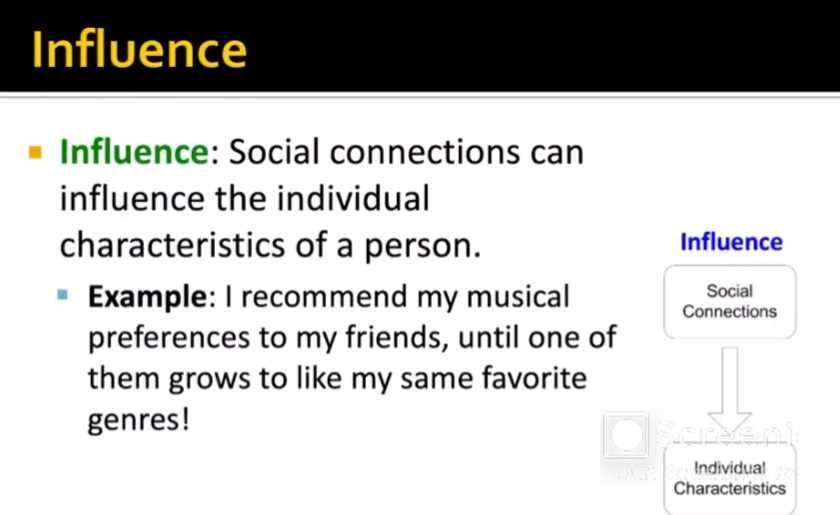

- 소셜 연결은 다른 사람의 특징에 영향을 줄 수 있다.

예를 들어,
- 내 음악 취향을 친구한테 추천했더니, 그들 중 한명이 같은 취향을 가지게 됐다.

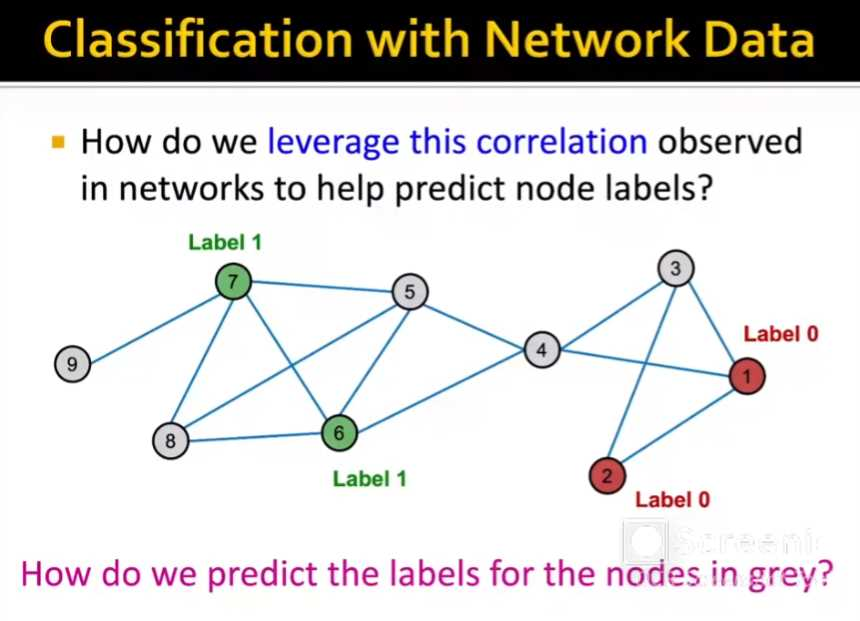

- 회색 노드의 색상을 학습하거나 예측하는 알고리즘을 어떻게 생각해 낼 수 있느냐는 것이다.


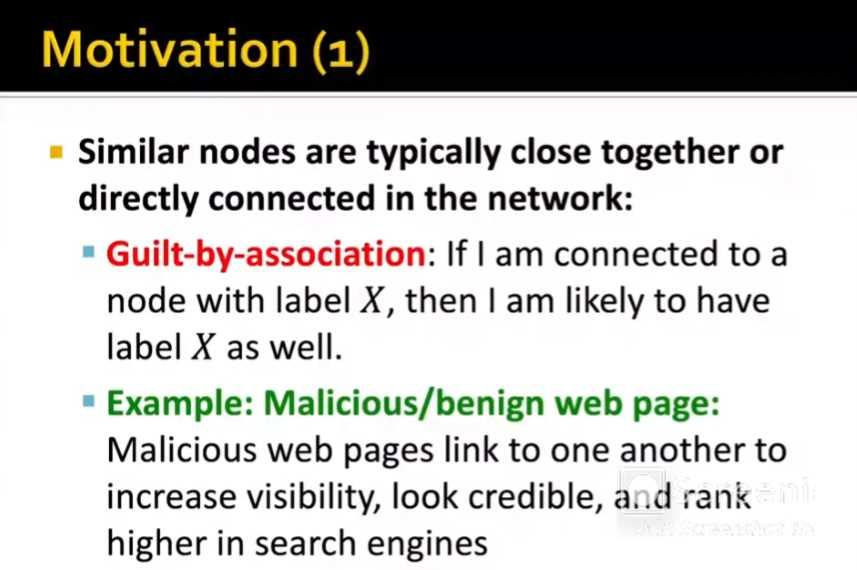

- 비슷한 노드들은 가깝게 뭉쳐있거나, 직접적으로 연결되어 있다.

- Guilty-by-association : label x에 연결되어 있으면, 나도 label x일 가능성이 있다.
- Example : 어떤 페이지가 악성 페이지라면 연결되어 있는 페이지들도 악성일 확률이 높다.

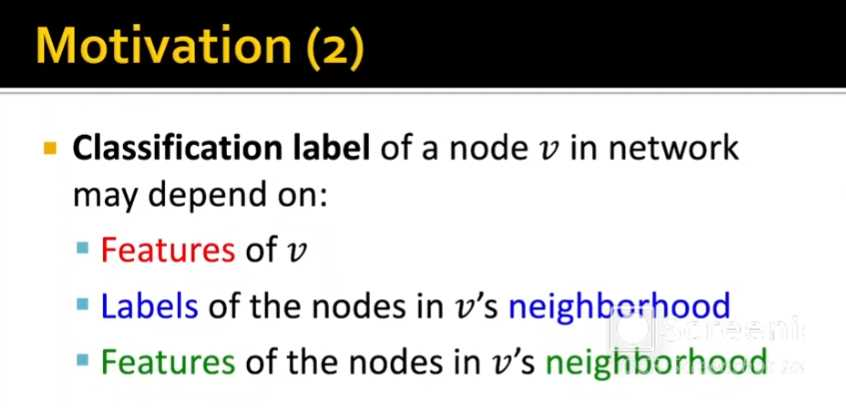

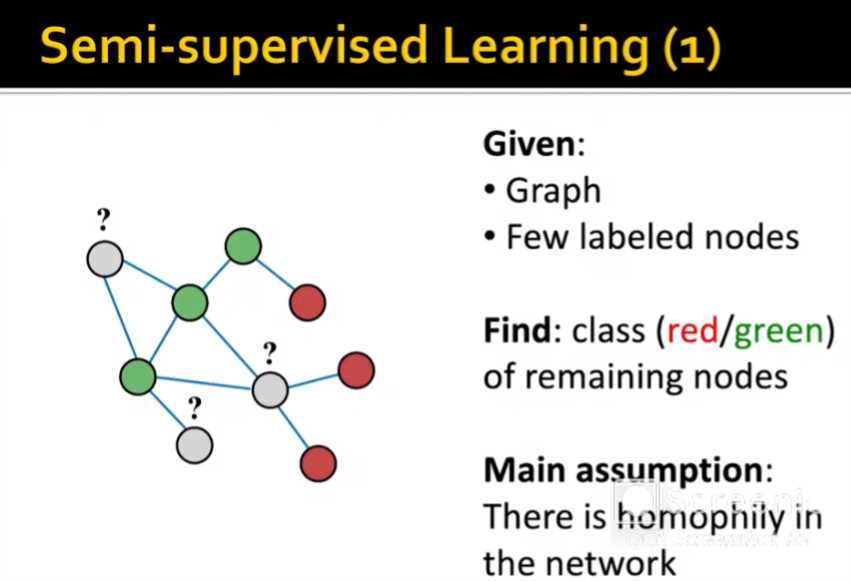

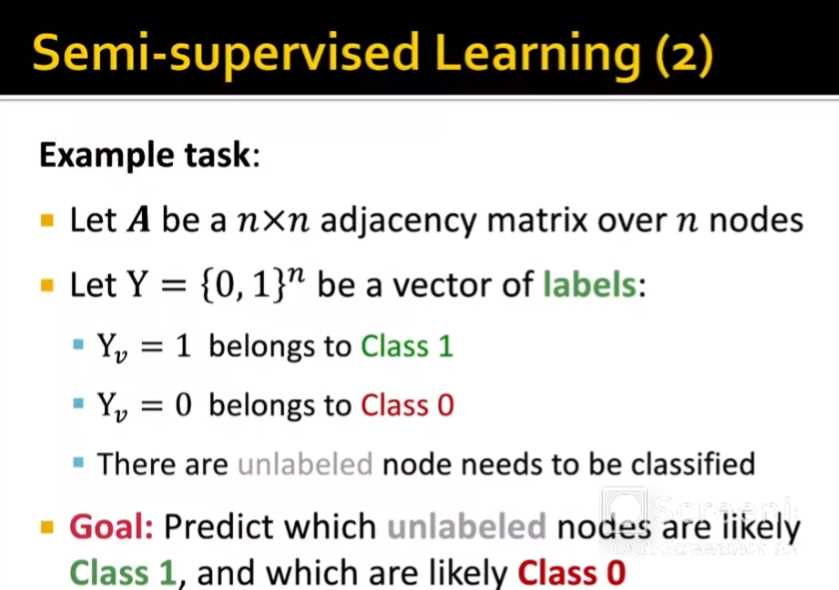

예를 들어,

- 그래프 구조를 포착한다고 하면,
- 인접행렬에 가중치가 있을 수도 있고, 없을 수도 있고
- 가중치가 있을 수도 있고, 없을 수도 있다.
- 방향이 있을 수도 있고, 없을 수도 있다.

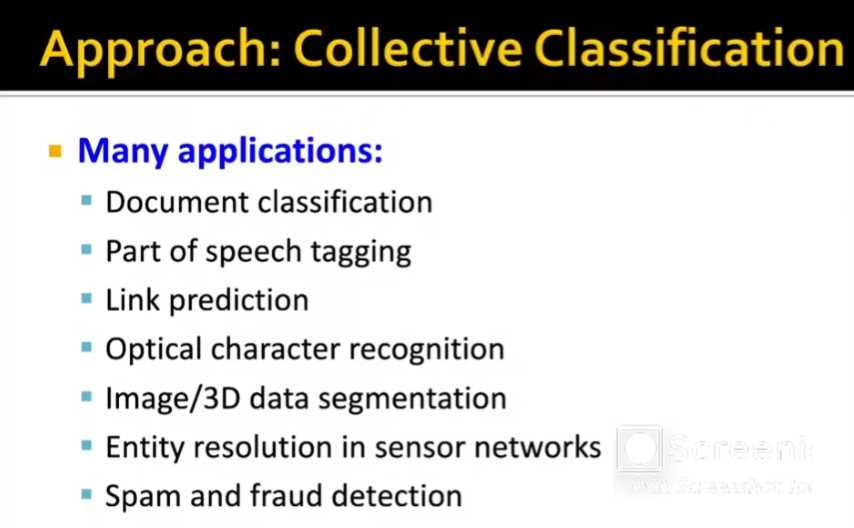

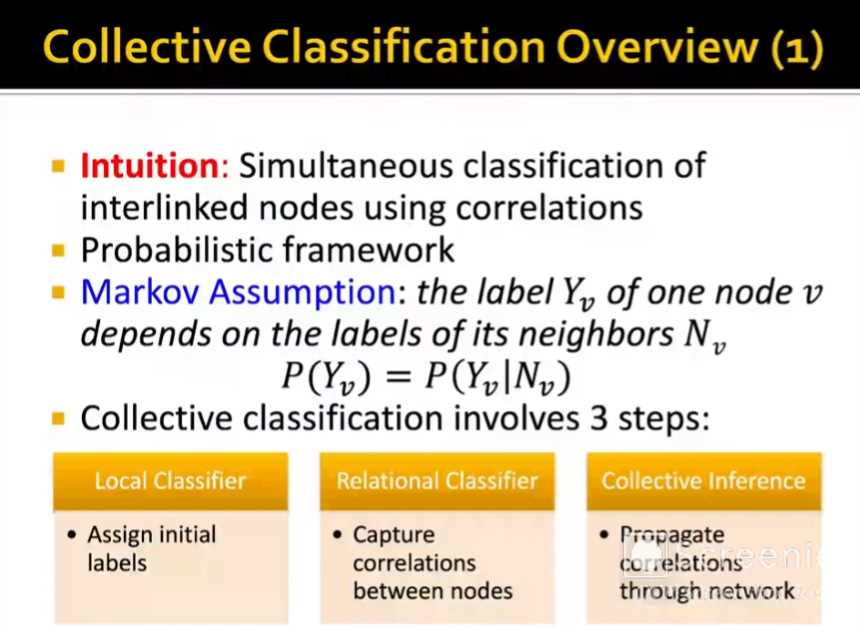

### - Collective Classicification



- 예를 들어, SNS에 친구들이 다 정치인이라면, 그 사람도 정치인일 확률이 높다. -> 서로 맞팔해야 하니까

- 연결 정보를 이용해서 더 정확하게 분류하는게 Collective Classification이다.




### - Markov Assumption

- 한 노드의 레이블은 이웃 노드 레이블만 보고 결정할 수 있다.

- 예를 들어,

- A, B, C가 친구이고,
- A : 정치인, B : 정치인, C : ???
- C를 정치인으로 분류 할 수 있다.
- -> C는 A,B만 보면 된다는 것이 마르코브 가정이다.


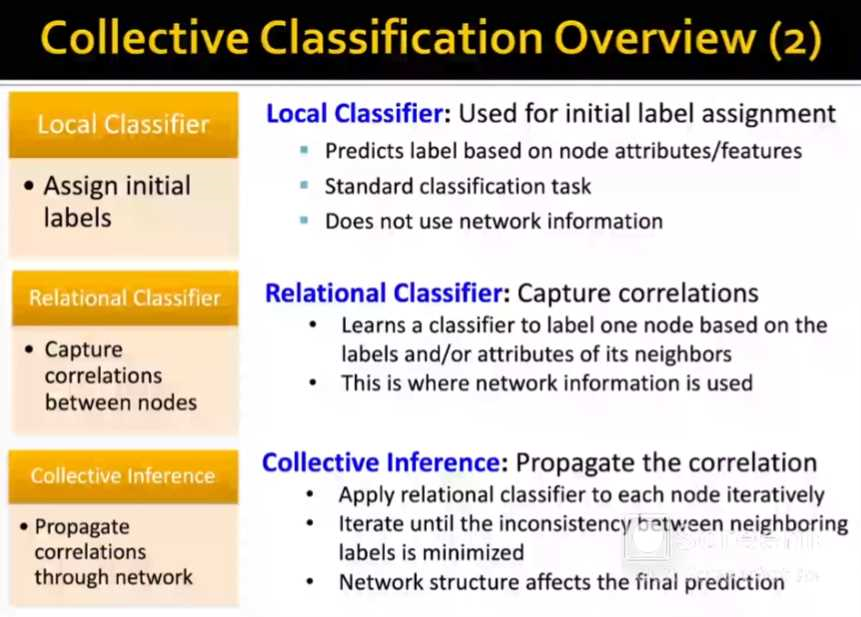

### - Local Classifier : Used for initial label assignment





- 각 노드를 독립적으로 분류함

- 이웃 노드에 관심 없음

- 네트워크 사용 x -> SNS에서 사용자의 나이, 성별, 관심사 정보만 보고 직업 분류

### - Relational Classifier : Capture correlations

- 그래프의 구조를 일부 활용

- 하지만, 이웃 노드들의 레이블이 이미 알고 있다는 전제를 둠

- 고정된 이웃 정보만 사용 -> 친구들이 대부분 ‘정치인’이면 그 사람도 ‘정치인’일 확률이 높다고 분류

### - Collective inference : Propagate the Correlation


- 이웃 노드의 추론된 레이블까지도 사용

- 예측을 반복적으로 수행하면서 전체 네트워크의 레이블을 점점 정확하게 추정

- Iterative한 방식 (예: label propagation)

예를 들어,

1. A와 B는 친구이고 A의 레이블은 '정치인'

2. B의 레이블은 모르지만 '정치인'일 확률이 높다고 추정

3. 이후 C가 B와 연결돼 있으면, B의 추정값이 C에게 영향을 줌
→ 이런 식으로 전체 네트워크를 활용해 분류